<a href="https://colab.research.google.com/github/OH1107/aisa_edu/blob/master/ML/ML_4%EC%9D%BC%EC%B0%A8_20200821_%EC%8B%9C%EA%B0%81%ED%99%94%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시각화
## 1. Chart Suggestions

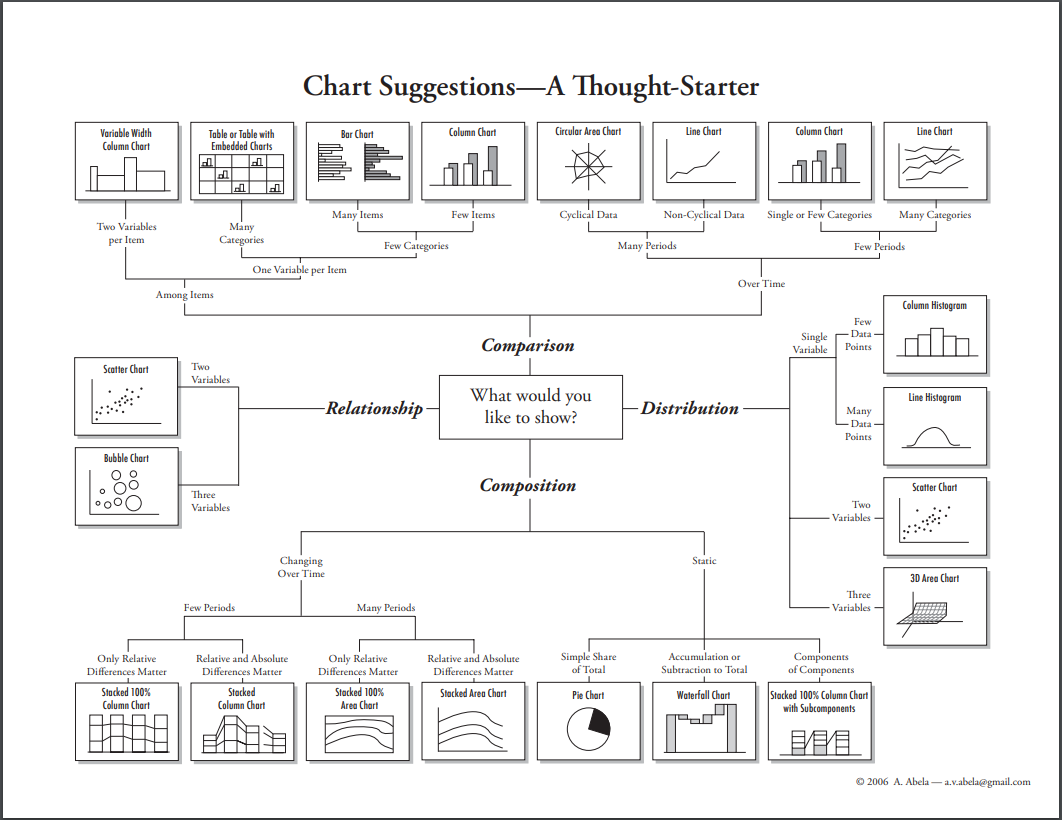

- 시각화에 있어 어떤 차트를 사용하는지가 아주 중요하다.
- 위 그림을 참고하면 비교, 관계분석 등 범주 데이터의 형태, 가지 수에 따라서 많은 차트로 나눠지게 된다.

## 2. Seaborn 실습
- 시각화 연습을 위해 `Seaborn`을 활용해 실습을 진행하고자 한다.
- `Seaborn` 의 튜토리얼 메뉴를 사용해 진행하고자한다.
 + https://seaborn.pydata.org/tutorial/relational.html

### 1. 통계적 관계 시각화
- 데이터 변수가 서로 어떻게 관련되있는지 이해하기 위한 과정이다.
-  대표적으로 산점도 `scatterplot`과 막대그래프 `lineplot`이 있다.

In [1]:
# 기본 모듈 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn 스타일 세팅 
sns.set(style="darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- 실습하기에 앞서 `seaborn`의 기본 내장 데이터`tips`를 호출한다.

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 1. 산점도 그래프
- 산점도 그래프는 점 표시를 사용하여 두 변수의 공동 분포를 묘사한다.

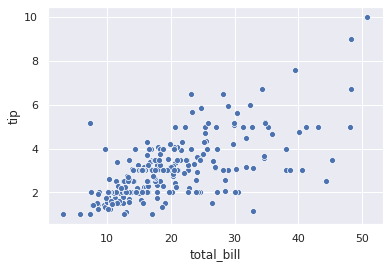

In [3]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

- `Hue`
  + 기본적인 산점도 그래프는 두가지 변수를 입력받아 2차원의 그래프에 점이 표시된다.
    + 이 때, 변수에 따라 점의 색깔을 달리한다면 한 가지 차원을 추가할 수 있다.

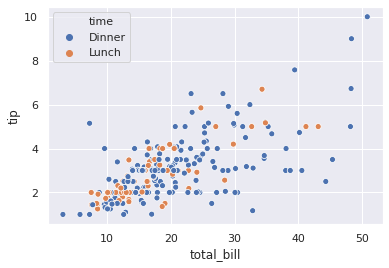

In [4]:
# time을 기준
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='time')

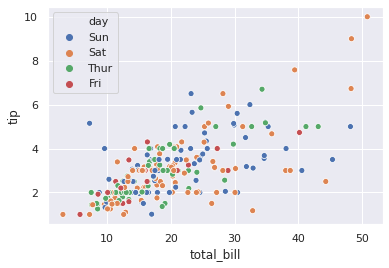

In [5]:
# day를 기준
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='day')

- 각 포인트의 색생과 스타일을 개별적으로 변경하여 총 4가지의 변수를 표현할 수도 있다.

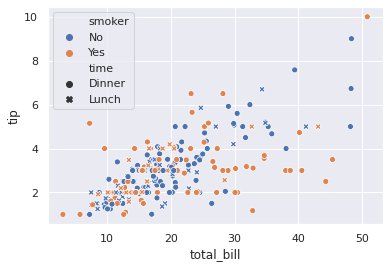

In [6]:
# smoker와 time을 기준
sns.scatterplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

- 만약 `hue`에 해당 되는 변수가 `categorical`이 아닌 `numeric`이라면 연속되는 색상조합`sequential palette`로 바뀐다.

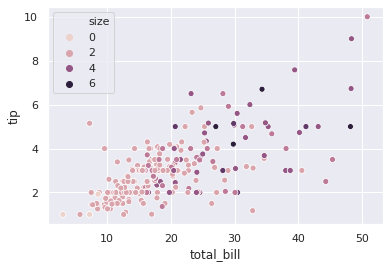

In [7]:
# size를 기준
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='size')

- `palette`에 값을 주어 색상을 변경할 수 있다.

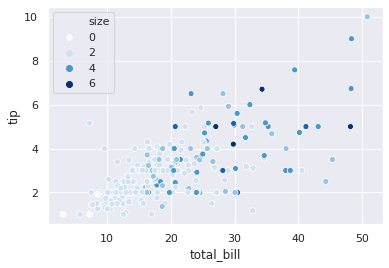

In [8]:
# sequential palette을 `Blues`로
sns.scatterplot(x='total_bill', y='tip', palette = 'Blues', hue='size', data=tips)

- 다음의 링크를 통해 `color palettes`를 만드는 법을 알 수 있다.
- https://seaborn.pydata.org/tutorial/color_palettes.html

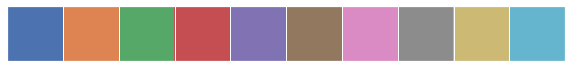

In [9]:
# seaborn에 기본 10가지 색상
# 해당 색상을 가지고 seaborn이 알맞게 호출해서 입혀준다.

current_palette = sns.color_palette()
sns.palplot(current_palette)

- size에 `numeric` 변수를 주어 크기별로 표현할 수 있다.

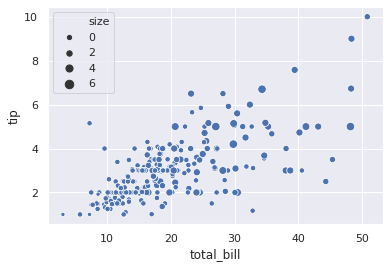

In [10]:
sns.scatterplot(x="total_bill", y="tip", size="size", data=tips);

- sizes라는 속성을 추가하여 크기를 임의대로 설정할 수 있다.

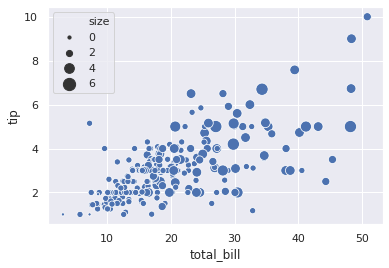

In [11]:
sns.scatterplot(x="total_bill", y="tip", size="size", sizes=(10, 150), data=tips);

#### 2. 꺽은선 그래프
- 시각화는 정해진 방법이 없기때문에 데이터에 따라 알맞은 방법을 선택해야 한다.
- 한 변수의 변화를 연속한 변수에 따라 (시간 함수 등) 표현하고자 할때 `lineplot`이 효과적이다.
  + `relplot()` 함수를 사용한다면, `kind = 'line'`으로 설정해줘야 한다.

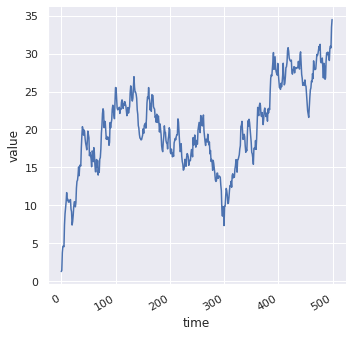

In [12]:
# 가상의 데이터 생성
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x='time', y='value', kind='line', data=df)

# autofmt_xdate : 시간에 맞추어 알아서 가이드해주는 함수
g.fig.autofmt_xdate()

- 실습을 위해 내장데이터를 불러온다.

In [13]:
fmri = sns.load_dataset("fmri")
fmri.head(3)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033


In [14]:
fmri.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


- x축에 대해 복잡한, 여러 측정값을 갖는 경우,
  + 주위에 95% 신뢰 구간을 플로팅하여 여러 값을 측정할 수 있다.

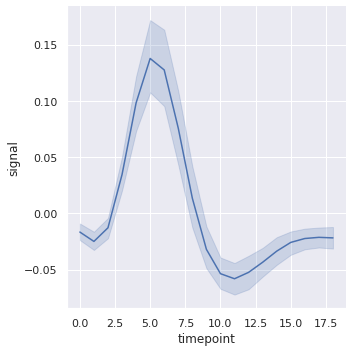

In [15]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

- 하지만 신뢰 구간은 대규모 데이터일 경우 시간이 오래 걸릴 수 있다.
  + 이 때는 비활성화를 하면 더빠른 출력이 가능하다.
  + `ci` 속성 값에 표준편차의 범위`ci='sd'` 등 다양한 옵션을 부여할 수 있다.

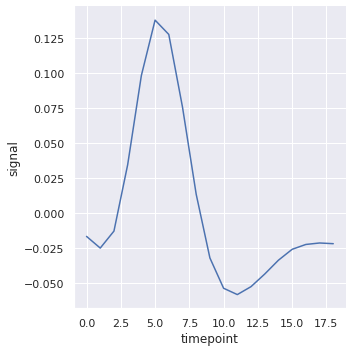

In [16]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

- `hue`를 통해 다른 변수도 추가가 가능하다.

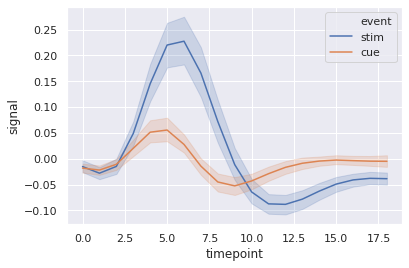

In [17]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)

- `lineplot`도 `style` 속성을 추가하여 총 4가지의 변수를 비교할 수 있다.

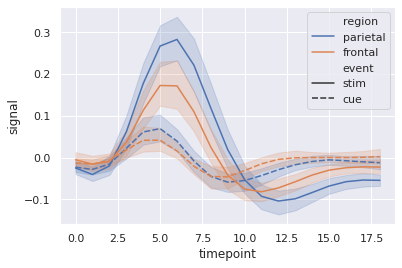

In [18]:
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)

- `lineplot`또한 `categorical`,`numeric` 범주를 구분하여 색상, 범례 처리가 달라진다.

In [19]:
dots = sns.load_dataset("dots").query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


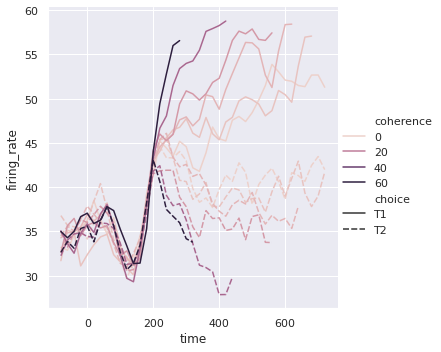

In [20]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

- 연속형 범주에 `size`속성을 추가하여 선의 너비에 따른 선 그래프를 작성할 수 있다.

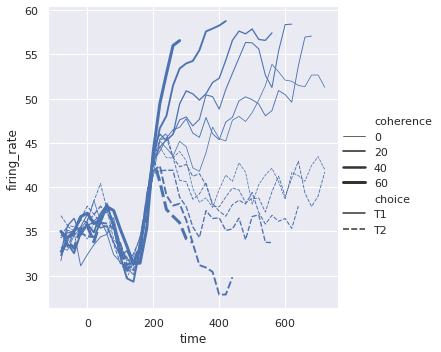

In [21]:
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots);

- 날짜 데이터
  - 선 그래프는 날짜 및 시간과 관련된 데이터를 시각화하는데 자주 사용된다.

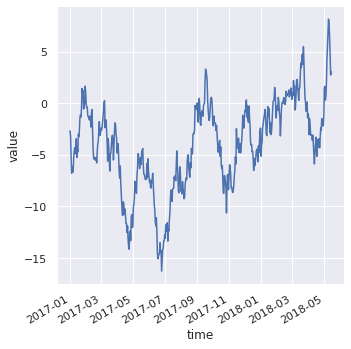

In [22]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

#### 3. 다중 관계 그래프
  - 여러 그래프를 동시에 띄우는 것은 항상 효과적인 것만은 아니다.
  - 그러나 두 변수 간의 관계가 하나 이상의 다른 변수에 어떻게 의존하는지를 확인하기에 용이하다.

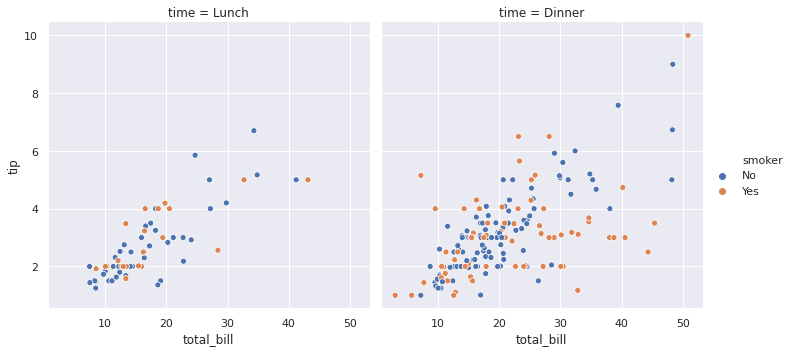

In [25]:
# col='time'으로 'time'에 해당되는 변수들과 tip간의 관계를 보여준다.
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

### 2. 범주형 데이터 시각화
- 주요 변수 중 하나가 "이산형 데이터"인 경우 시각화에 아래와 같은 방식이 효과적이다.
- `catplot()`에 `kind`값을 주어서 아래의 함수와 같은 그래프를 출력할 수 있다.
  - 범주 형 산점도 :
    - `stripplot()`(`kind="strip"` 기본값)
    - `swarmplot()`(`kind="swarm"`)
  - 범주 형 분포도 :
    - `boxplot()`(`kind="box"`)
    - `violinplot()`(`kind="violin"`)
    - `boxenplot()`(`kind="boxen"`)
  - 범주 형 추정 플롯 :
    - `pointplot()`(`kind="point"`)
    - `barplot()`(`kind="bar"`)
    - `countplot()`(`kind="count"`)

In [26]:
# 필요 모듈 호출
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

#### 1. 범주형 산점도
- `catplot()`의 `default`값인 `stripplot()`을 사용한다.
- 한 범주에 속하는 모든 포인트가 범주 형 변수에 해당하는 축을 따라 동일한 위치에 속하게 된다.

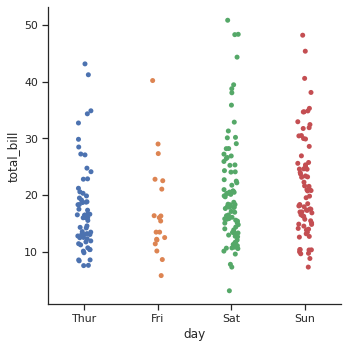

In [27]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

- `kind = 'swarm'`을 설정하여 관측치의 분포를 더 잘 확인할 수 있다./

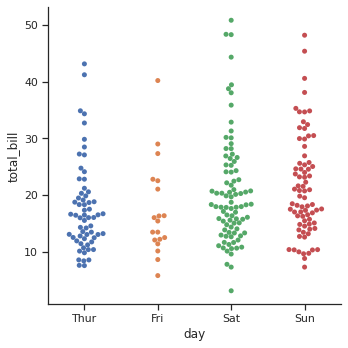

In [28]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

- `hue` 설정을 통해 다른 차원을 추가 할 수 있다.

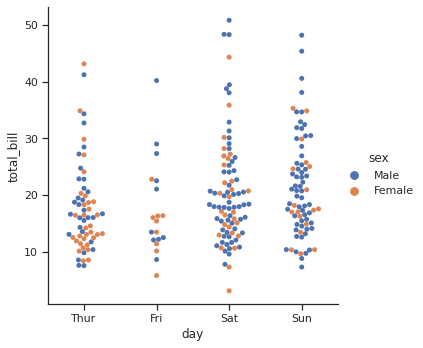

In [29]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

- 범주형 범수라면 변수가 숫자라도 아래와 같이 표현된다.
- 또한 레이블을 직접 지정하여 (`data=tips.query("size != 3")`) 시각화를 진행할 수 있다.

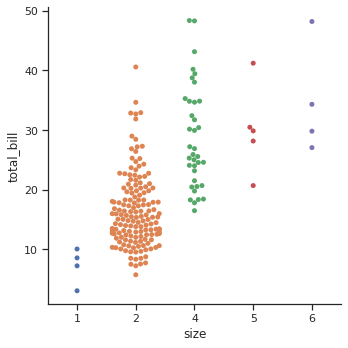

In [30]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

- x축과 y축의 데이터를 바꿔 입력하면 세로형이 아닌 가로형으로 확인할 수 있다.

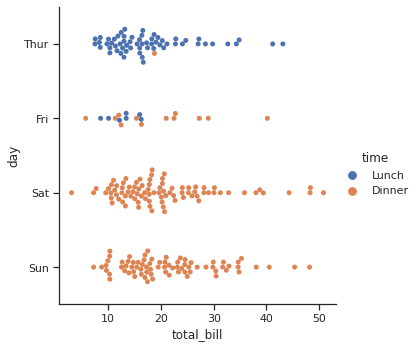

In [31]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

#### 2. 범주형 분포도
- `boxplot()`과 `violinplot()`을 사용한다.
- 각 범주 내의 값이 어떻게 분포해 있는지에 대해 확인할 수 있다.

##### 1. 박스 플롯
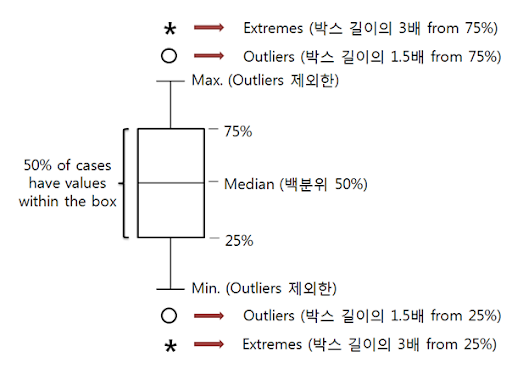

- 위의 그림은 `boxplot`을 통해서 확인 할 수 있는 분포이다.

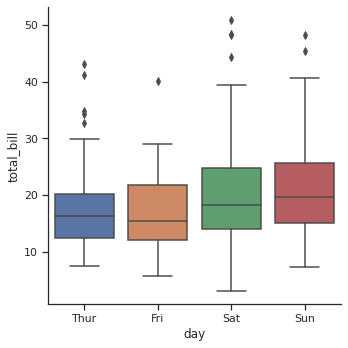

In [33]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

- `hue`를 추가하면 각 수준에 대한 상자가 하나씩 더 생성된다.

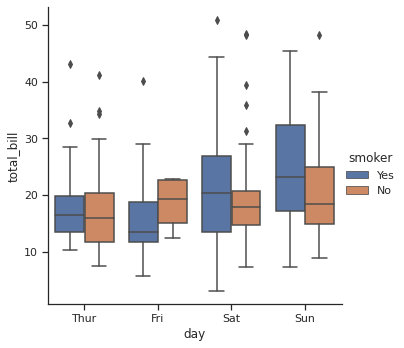

In [34]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

- 비슷한 형태의 `boxenplot()`은 `boxplot()`과 유사하지만 분포 모양에 대한 자세한 정보를 표시한다.
- 더 큰 데이터 세트에 가장 적합하다.

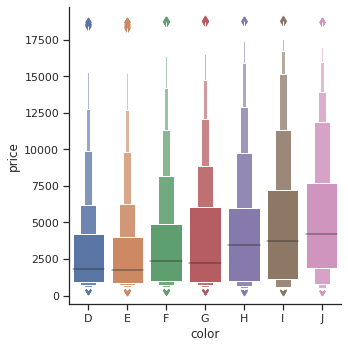

In [35]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen", data=diamonds.sort_values("color"))

##### 2. 바이올린 플롯
- `boxplot()`과 `violinplot()`은 서로 유사하다
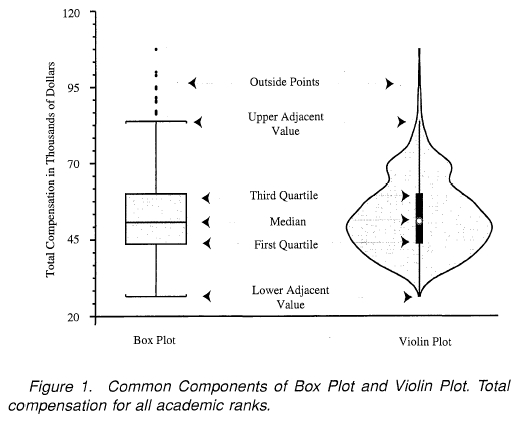

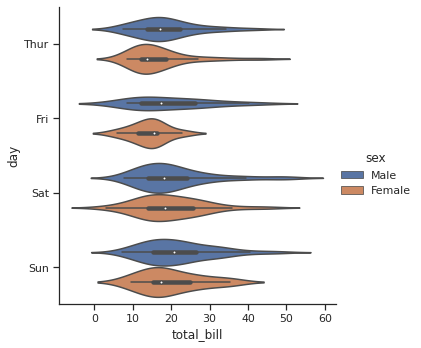

In [36]:
sns.catplot(x="total_bill", y="day", hue="sex", kind="violin", data=tips);